# Tarea Practica 1

Hugo J. Rodas
17006259


La tarea 1 consiste en hacer regresión lineal de 1 variable con Tensorflow,usando el dataset de predicción de precios de casas(mismo usado en el curso anterior). La tarea debe cumplir con:
* Entregarse por github en un jupyter notebook,subiendo el link de github al GES.
* Usar tensorboard para visualizar el grafo del modelo y la curva de aprendizaje(error en el tiempo)
* Usar un enfoque de investigacion científica para la selección del learning-rate(mas detalles al final).
* Definir un solo grafo pero enviar información variable(como el learning rate) en distintas sesiones a través del diccionario "feed_dict".
* No es necesario trabajar con datos de validación para esta tarea,pero es permitido hacerlo para quien desee.
Para la seleccion del learning rate, debe usarse un enfoque de investigacion científica , esto significa que cada quien debe plantear una o varias hipótesis respecto a lo que cree o espera que pase con los diferentes valores del learning rate a usar(usar: 10,1,0.1,0.01,0.001,0.0001).

Estas hipótesis pueden basarlas en lo visto en clase respecto al LR , durante el desarrollo experimentamos con los valores del LR y capturamos los resultados usando tensorboard,sacamos un screenshot de tensorboard para cada valor de lr, los screenshots de tensorboard deben ser agregados en el jupyter notebook en una celda tipo 'markdown' (estos seran la evidencia para aceptar o rechazar las hipótesis) , luego debemos en markdown agregar conclusiones y recomendaciones en base a los resultados.


In [38]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

filename = 'proyecto_training_data.npy'

dataset = np.load(filename)
print(dataset[:5,:])

[[2.085e+05 7.000e+00 8.560e+02 8.000e+00 2.003e+03 6.500e+01]
 [1.815e+05 6.000e+00 1.262e+03 6.000e+00 1.976e+03 8.000e+01]
 [2.235e+05 7.000e+00 9.200e+02 6.000e+00 2.001e+03 6.800e+01]
 [1.400e+05 7.000e+00 9.610e+02 7.000e+00 1.915e+03 6.000e+01]
 [2.500e+05 8.000e+00 1.145e+03 9.000e+00 2.000e+03 8.400e+01]]


Separacion del dataset para que:
- 80% sea para el entrenamiento, datos de entrenamiento
- 20% para validacion, datos de validacion y pruebas

In [39]:
lengthdata = len(dataset)

train_perc = 0.80
valid_perc = 1 - train_perc

train_length = int( lengthdata * train_perc)
valid_length = int( lengthdata * valid_perc)

train_data = dataset[0:train_length,:]
valid_data = dataset[train_length:lengthdata,:]

print(len(train_data) + len(valid_data))

1460


Separacion de train_data en cada variable.

In [40]:
# Subconjuntos para Entrenamiento
SalePrice = train_data[:,0]
OverallQual = train_data[:,1]
FirstFlrSF = train_data[:,2]
TotRmsAbvGrd = train_data[:,3]
YearBuilt = train_data[:,4]
LotFrontage = train_data[:,5]

#Excluyendo nan de LotFrontage para LotFrontage y para SalePrice
LotFrontage_exLFnan = LotFrontage[np.logical_not(np.isnan(LotFrontage))]
SalePrice_exLFnan = SalePrice[np.logical_not(np.isnan(LotFrontage))]


# Subconjuntos para Validacion
SalePrice_val = valid_data[:,0]
OverallQual_val = valid_data[:,1]
FirstFlrSF_val = valid_data[:,2]
TotRmsAbvGrd_val = valid_data[:,3]
YearBuilt_val = valid_data[:,4]
LotFrontage_val = valid_data[:,5]

Numero de Observaciones:

In [41]:
n = len(OverallQual)
print(n)

1168


**Calidad en General (OverallQual):**

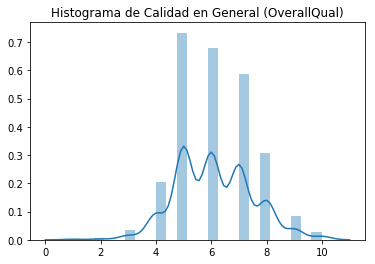

In [42]:
sns.distplot(OverallQual,label="Calidad en General (OverallQual)")
plt.title("Histograma de Calidad en General (OverallQual)")
plt.show()

   Creando X y Y que se utilizaran en el optimizador en el entrenamiento.

In [43]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 


Creando las variables para los pesos:

In [44]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


Hyperparametros: Learning rate y Epochs de entrenamiento

In [45]:
LR = 0.01
Epochs = 1000


Hipotesis, funcion de costo, optimizador e iniciador.

In [54]:
# Modelo Linear 
y_pred = tf.add(tf.multiply(X, W), b) 

# Funcion de costos, MSE 
func_costo = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Optimizador
optimizador = tf.train.GradientDescentOptimizer(LR).minimize(func_costo) 

# Iniciador
Iniciador = tf.global_variables_initializer() 


In [58]:
 
with tf.Session() as sess: 

    # Iniciando variables 
    sess.run(Iniciador) 
    
    
    Costo = sess.run(func_costo, feed_dict ={X: OverallQual, Y: SalePrice}) 
    pesos = sess.run(W) 
    sesgo = sess.run(b) 


In [59]:

prediccion = pesos * OverallQual + sesgo 
print("Costo =", Costo)
print("Pesos =", pesos)
print("Sesgo =", sesgo )


Costo = 19408988000.0
Pesos = 0.70066017
Sesgo = -0.56709117


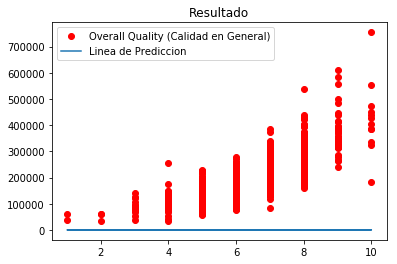

In [60]:
plt.plot(OverallQual, SalePrice, 'ro', label ='Overall Quality (Calidad en General)') 
plt.plot(OverallQual, prediccion, label ='Linea de Prediccion') 
plt.title('Resultado') 
plt.legend() 
plt.show() 
